In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

plt.rc('font', size=20)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=20, frameon=False)
plt.rc('xtick', labelsize=20, direction='in')
plt.rc('ytick', labelsize=20, direction='in')
plt.rc('figure', figsize=(9, 4))


# Parameters
n_points = 330  # Number of points
sigma = 1.0  # Standard deviation for the Gaussian kernel

# Generate data points
x = np.linspace(-30, 30, n_points)

# Gaussian kernel function
def gaussian_kernel(x, y, sigma):
    return np.exp(-np.square(x - y) / (2 * sigma ** 2))

def laplace_kernel(x, y, sigma):
    return np.exp(-np.abs(x - y).sum() / (2 * sigma ** 2))

# Compute the Gaussian kernel matrix
kernel_matrix = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        kernel_matrix[i, j] = gaussian_kernel(x[i], x[j], sigma)
        # kernel_matrix[i, j] = laplace_kernel(x[i], x[j], sigma)

# Compute eigenvalues
eigenvalues = np.linalg.eigvalsh(kernel_matrix)
lmbda = 0.1

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]
eigenvalues_sorted_dmmd_tikhonov = eigenvalues_sorted / (eigenvalues_sorted + lmbda) * (1 + lmbda)
eigenvalues_sorted_dmmd_showalter = (1 - np.exp(-eigenvalues_sorted / lmbda) ) * (1 + lmbda)
eigenvalues_sorted_dmmd_cutoff = (eigenvalues_sorted > lmbda) * (1 + lmbda)

eigenvalues_sorted_chi2 = np.ones_like(eigenvalues_sorted) 

# # Plot the eigenvalues
# x = np.arange(1, n_points + 1)
# plt.scatter(x, eigenvalues_sorted, marker='o', s=2, color='steelblue')
# plt.scatter(x, eigenvalues_sorted_dmmd_tikhonov, marker='o', s=2, color='red')
# plt.scatter(x, eigenvalues_sorted_chi2,  marker='o', s=2, color='brown')
# plt.plot([], [], color='steelblue', label=r'$\text{MMD}$')
# plt.plot([], [], color='red', label=r'$\text{DMMD}$')
# plt.plot([], [], color='brown', label=r'$\chi^2$')
# plt.axhline(y=lmbda, color='black', linestyle='--')
# plt.text(-5, lmbda, r'$\lambda$', verticalalignment='center', color='black')

# plt.xlim([0, n_points + 1])

# plt.xlabel(r'$i$', fontsize=26)
# plt.ylabel(r'$w_i$', fontsize=29)
# plt.yscale('log')
# # plt.yticks([])
# plt.legend()
# plt.tight_layout()

# plt.savefig(f'/home/zongchen/chard/figures/eigenvalue.pdf')
# plt.show()

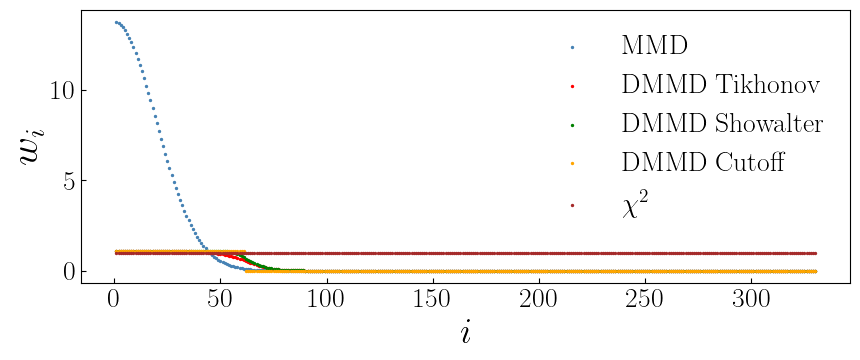

In [15]:
x = np.arange(1, n_points + 1)
plt.scatter(x, eigenvalues_sorted, marker='o', s=2, color='steelblue', label=r'$\text{MMD}$')
plt.scatter(x, eigenvalues_sorted_dmmd_tikhonov, marker='o', s=2, color='red', label=r'$\text{DMMD Tikhonov}$')
plt.scatter(x, eigenvalues_sorted_dmmd_showalter, marker='o', s=2, color='green', label=r'$\text{DMMD Showalter}$')
plt.scatter(x, eigenvalues_sorted_dmmd_cutoff, marker='o', s=2, color='orange', label=r'$\text{DMMD Cutoff}$')
plt.scatter(x, eigenvalues_sorted_chi2,  marker='o', s=2, color='brown', label=r'$\chi^2$')

# plt.axhline(y=lmbda, color='black', linestyle='--')
# plt.text(-5, lmbda, r'$\lambda$', verticalalignment='center', color='black')

# plt.xlim([-0.1, n_points + 1])

plt.xlabel(r'$i$', fontsize=26)
plt.ylabel(r'$w_i$', fontsize=29)
# plt.yscale('log')
plt.legend()
plt.tight_layout()

plt.show()

In [16]:
eigenvalues_sorted_dmmd_tikhonov

array([ 1.09204436e+00,  1.09201324e+00,  1.09196110e+00,  1.09188754e+00,
        1.09179198e+00,  1.09167368e+00,  1.09153169e+00,  1.09136488e+00,
        1.09117190e+00,  1.09095116e+00,  1.09070084e+00,  1.09041883e+00,
        1.09010271e+00,  1.08974973e+00,  1.08935676e+00,  1.08892023e+00,
        1.08843614e+00,  1.08789992e+00,  1.08730641e+00,  1.08664979e+00,
        1.08592345e+00,  1.08511993e+00,  1.08423077e+00,  1.08324643e+00,
        1.08215605e+00,  1.08094735e+00,  1.07960640e+00,  1.07811739e+00,
        1.07646239e+00,  1.07462100e+00,  1.07257008e+00,  1.07028331e+00,
        1.06773080e+00,  1.06487857e+00,  1.06168803e+00,  1.05811538e+00,
        1.05411093e+00,  1.04961839e+00,  1.04457415e+00,  1.03890641e+00,
        1.03253442e+00,  1.02536770e+00,  1.01730530e+00,  1.00823530e+00,
        9.98034436e-01,  9.86568199e-01,  9.73691433e-01,  9.59249664e-01,
        9.43081402e-01,  9.25021671e-01,  9.04907024e-01,  8.82582291e-01,
        8.57909193e-01,  

In [17]:
eigenvalues_sorted

array([ 1.37266713e+01,  1.36727921e+01,  1.35834646e+01,  1.34593890e+01,
        1.33015326e+01,  1.31111175e+01,  1.28896046e+01,  1.26386747e+01,
        1.23602075e+01,  1.20562581e+01,  1.17290316e+01,  1.13808565e+01,
        1.10141570e+01,  1.06314255e+01,  1.02351940e+01,  9.82800718e+00,
        9.41239501e+00,  8.99084783e+00,  8.56579217e+00,  8.13956880e+00,
        7.71441283e+00,  7.29243611e+00,  6.87561219e+00,  6.46576379e+00,
        6.06455299e+00,  5.67347396e+00,  5.29384835e+00,  4.92682313e+00,
        4.57337078e+00,  4.23429174e+00,  3.91021881e+00,  3.60162331e+00,
        3.30882293e+00,  3.03199075e+00,  2.77116545e+00,  2.52626230e+00,
        2.29708479e+00,  2.08333654e+00,  1.88463354e+00,  1.70051615e+00,
        1.53046102e+00,  1.37389261e+00,  1.23019415e+00,  1.09871806e+00,
        9.78795586e-01,  8.69745689e-01,  7.70883131e-01,  6.81525667e-01,
        6.01000401e-01,  5.28649276e-01,  4.63833730e-01,  4.05938548e-01,
        3.54374956e-01,  